# 05 Time series Analysis

If you understand the trends of a business, you can identify its faults and plan for improvements.

The analysis and understanding of time series is an important skill.

However we must understand first how to utilize python's native date and time module, __datetime__.

## The datetime module

Our calendar is hard to translate into python code. Leap years, leap seconds, weekends, days of the week are concepts we are familiar with, because it is part of our culture. However, programmatically, we have a linear notion of time. Fortunately, everything we need to analyse temporal trends is present in the datetime module (python standard).

With business trends, you have to remember three things when analysing data:

1. The human being is a creature of habits.
1. [The Law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) tells us that with enough data points you will see results approximating its expected value. Events with low probability will start to show up in your data, and events with high probability will beahve as expected.
1. Disruptive events destroy 1 and 2.

In some business models, the glue that holds an analysis or model together is the ability to consistently track the passage of time, independently of where you are in the world (timezone).

In [2]:
import datetime
dir(datetime)

['MAXYEAR',
 'MINYEAR',
 'UTC',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'date',
 'datetime',
 'datetime_CAPI',
 'time',
 'timedelta',
 'timezone',
 'tzinfo']

Notice the date, time, datetime and timedelta classes:

* __date__ was python's original class to handle days (calendar)
* __time__ was python's original class to handle time (hours, minutes, seconds, ms, etc...)
* __datetime__ is the amalgamation of the prvious classes. It now holds everything needed to represent temporal informaiton.
* __timedelta__ is a special class to perform temporal additions and subtractions.

In [3]:
help(datetime)

Help on module datetime:

NAME
    datetime - Fast implementation of the datetime type.

MODULE REFERENCE
    https://docs.python.org/3.12/library/datetime.html

    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

CLASSES
    builtins.object
        date
            datetime
        time
        timedelta
        tzinfo
            timezone

    class date(builtins.object)
     |  date(year, month, day) --> date object
     |
     |  Methods defined here:
     |
     |  __add__(self, value, /)
     |      Return self+value.
     |
     |  __eq__(self, value, /)
     |      Return self==value.
     |
     |  __format__(...)
     |      Formats self with strftime.
     |
     |  __ge__(self, value, /)
     |      Return sel

[Launch date of the best music album of all time](https://en.wikipedia.org/wiki/Second_Toughest_in_the_Infants)

In [7]:
sci = datetime.datetime(1996, 3, 11)

In [8]:
sci

datetime.datetime(1996, 3, 11, 0, 0)

In [9]:
print(sci)

1996-03-11 00:00:00


In [10]:
print(sci.day, sci.year, sci.month)

11 1996 3


In [11]:
sci.weekday() #0 -> Monday, 6 -> Sunday

0

In [29]:
bday = datetime.datetime(1998, 3, 15)
bday.isoweekday()

7

<div class="alert alert-info"> 
    <br>
    <b>Exercise: In which day of the week were you born?</b>   
    <br>
    <br>
</div>

In [18]:
bday = datetime.datetime(1998, 3, 15)
bday.weekday()

6

---

## Format, format, FORMAT

A datetime value can have many representations. Remember that different parts of the world use the calendar in a different manner.

By default, datetimes are printed __yyyy-mm-dd hh:mm:ss__

If you start your file names with such a format, chronological order will match alphabetical order, releasing you from some overhead for organisation.

__IMPORTANT__: the datetime object stores the information at all time. The format is just a way of printing the datetime object information.

In [36]:
sci.strftime(format="%y-%m-%d")

'96-03-11'

In [45]:
sci.strftime(format="In %Y during %B, SCI was released on a %A. It was released in the %Uth week of the year. The itmezone is %Z")

'In 1996 during March, SCI was released on a Monday. It was released in the 10th week of the year. The itmezone is '

[Please check the __directives__ here](https://docs.python.org/3/library/datetime.html)

__Results may vary due to "locale"__!

In [59]:
date = datetime.datetime(2005, 9, 6)

date.strftime(format  = 'On %A, %B %d, I saw Underworld and Fatboy Slim at Sudoeste. This is the %Uth day of the year.')

'On Tuesday, September 06, I saw Underworld and Fatboy Slim at Sudoeste. This is the 36th day of the year.'

<div class="alert alert-info"> 
    <br>
    <b>Exercise: Write a small output for a special date with strftime. Something like "On August 6, 2005, I saw Underworld and Fatboy Slim at Sudoeste".</b>   
    <br>
    <br>
</div>

---

## Right about now

What day is today?

In [61]:
import datetime

sci = datetime.datetime(1996, 3, 11)

In [62]:
datetime.datetime.now()

datetime.datetime(2025, 3, 6, 10, 1, 32, 714830)

In [63]:
datetime.datetime.now().strftime(format="Today is %A.")

'Today is Thursday.'

The ```now``` method allows you to read computer time and create objects with information about "where in time" your code is running. How long ago was the music album released?

In [66]:
datetime.datetime.now() + sci

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'datetime.datetime'

You can __subtract__ datetime objects. When you perform a subtraction on __datetime__ objects you obtain a __timedelta__ object. However, __additions__ are not defined.

<div class="alert alert-info"> 
    <br>
    <b>Exercise: How old are you in days?</b>   
    <br>
    <br>
</div>

In [80]:
age = datetime.datetime.now() - bday
age.days/365

26.994520547945207

---

## The timedelta object

Due to the culture we live in, time has become something so ingrained in our lines of thought we may find it hard to convert it into computer code.

If it's January 31st, in 10 days it will not be January 41st. If it's 23:00, in two hours it will already be a new day, but probably not in some other time zones.

When you define a timedelta object, you need to specify the interval.

In [81]:
wk_interval = datetime.timedelta(days=7)

In [86]:
today = datetime.datetime.now()
today

datetime.datetime(2025, 3, 6, 10, 6, 35, 993043)

In [83]:
today - wk_interval

datetime.datetime(2025, 2, 27, 10, 6, 25, 569639)

In [84]:
today + wk_interval

datetime.datetime(2025, 3, 13, 10, 6, 25, 569639)

In [87]:
hour_interval = datetime.timedelta(hours=1)
hour_interval

datetime.timedelta(seconds=3600)

In [88]:
wk_interval + hour_interval

datetime.timedelta(days=7, seconds=3600)

In short:

| Object 1 | Object 2 | Result of subtraction | Result of addition|
|---|---|---|---|
| datetime | datetime | timedelta | not defined |
| datetime | timedelta | datetime | datetime |
| timedelta | timedelta | timedelta | timedelta |

__Remember__: You can't add January 2nd to February 8th. __Also__, the _timedelta_ object does not have the same methods as datetime. In fact, it has very little support.

In [120]:
today = datetime.datetime.now()
today
intertval = datetime.timedelta(days = 137+(3*365))
sum = today + intertval
sum

datetime.datetime(2028, 7, 20, 10, 11, 9, 902737)

<div class="alert alert-info"> 
    <br>
    <b>In 137 days from now, what day of the week is it going to be?</b>   
    <br>
    <br>
</div>

In [113]:
datetime.datetime.now() + datetime.timedelta(days=137)

datetime.datetime(2025, 7, 21, 10, 8, 42, 465530)

---

## Why does this matters?

Most data warehouses at a company's data lake could be managed by teams from different subcontractors. The different teams may have different standards when it comes to store chronological information. Let's assume we have two KPIs we want to monitor, from two different tables. The first is the revenue of online sales for the ficticional mobile app __Astronomy (A)__ and the second is the revenue of online sales for the also ficticional mobile app __Barbecuer (B)__ (files are in the '../Files/' directory). You know the sales figures are related to the same time period.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Astronomy

In [146]:
astro = pd.read_csv('../Files/Astronomy_sales.csv')

In [124]:
astro.head()

,date,sales
0,2024-01-03 23:00:00,11.107369
1,2024-01-04 00:00:00,17.829839
2,2024-01-12 15:00:00,16.449078
3,2024-01-13 06:00:00,17.616202
4,2024-01-10 21:00:00,11.783397


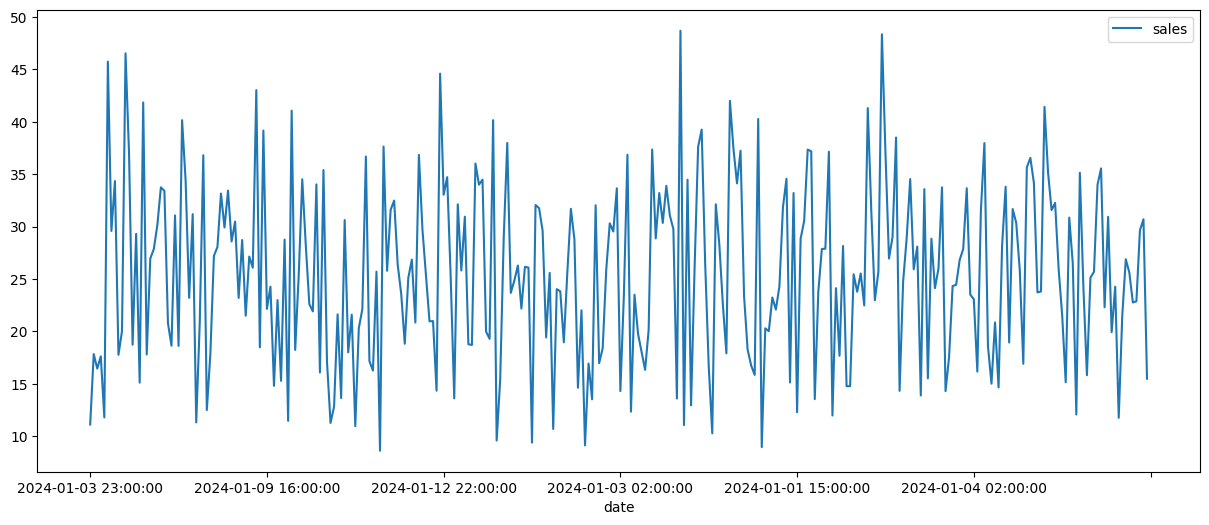

In [125]:
astro.plot(x='date', y='sales', figsize=(15,6))
plt.show()

In [126]:
astro.dtypes

date      object
sales    float64
dtype: object

__The dates are not in order!__ We are just plotting the values by the order they are stored in the file. Let's convert the "dates" column to datetime via pandas:

In [147]:
astro['date'] = pd.to_datetime(astro['date'])


In [149]:
astro.sort_values(by = 'date', inplace = True)

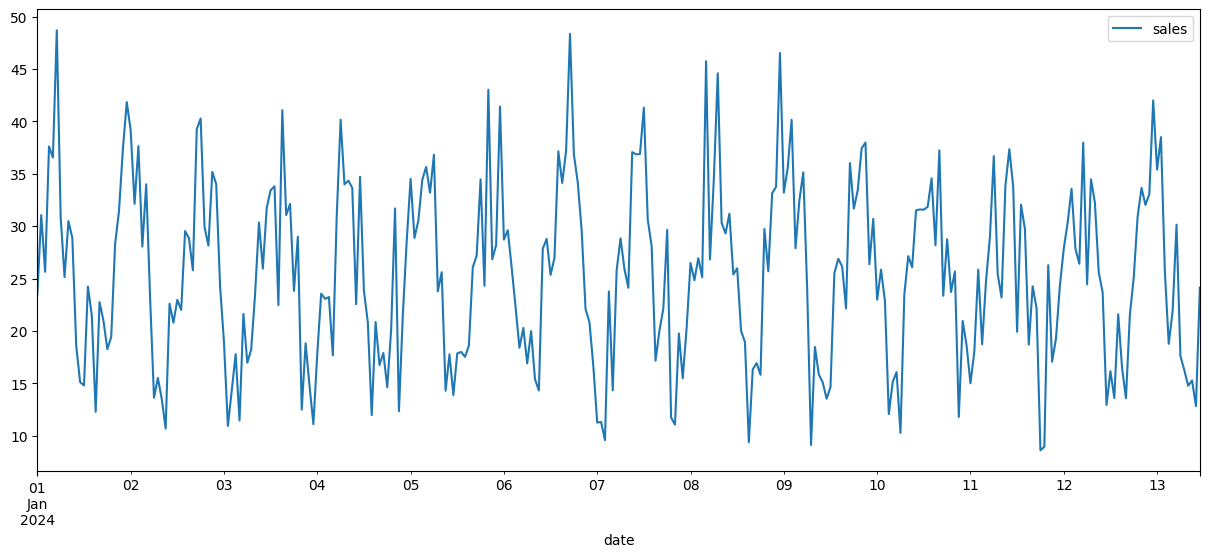

In [150]:
astro.plot(x='date', y='sales', figsize=(15,6))
plt.show()

If you pass a datetime object to pandas, pandas knows under the hood how to handle it. For instance, in plots, it automatically organises your time column in a chronological fashion.

In [129]:
astro.dtypes

date     datetime64[ns]
sales           float64
dtype: object

#### Barbecuer

The __Barbecuer__ table is handled by another Data Engineering team. Lets see how they stored it.

In [169]:
barb = pd.read_csv('../Files/Barbecuer_sales.csv')

In [167]:
barb.head()

,date,sales
0,24010605,20.151727
1,24010508,24.913147
2,24011300,21.957163
3,24010719,24.483973
4,24010909,19.053636


In [152]:
barb.dtypes

date       int64
sales    float64
dtype: object

In [175]:
barb['date'] = (pd.to_datetime(barb['date'], format = '%y%m%d%H'))
barb.sort_values('date', inplace = True)

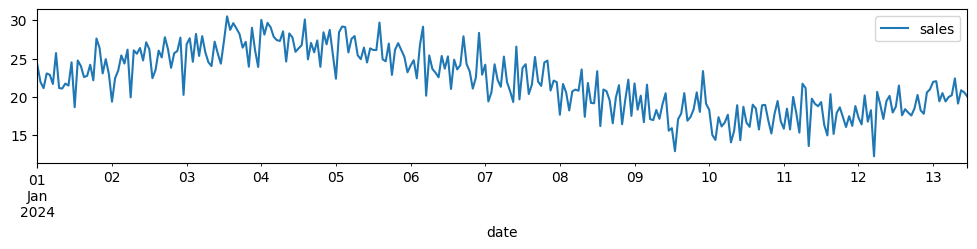

In [177]:
barb.plot(x='date', y='sales', figsize=(12,2))
plt.show()

In [ ]:
barb.set_index = 

What are we plotting now?

In [ ]:
barb['date'] = pd.to_datetime(barb['date'])

In [ ]:
barb.plot(x='date', y='sales', figsize=(15,6))
plt.show()

In [ ]:
barb.head()

We know for sure that we are not monitoring data for a mobile app in 1970!

Whilst __to\_datetime__ is very smart at inferring your time format, it will become apparent it does not cover every situation. Let's restart the Barbecuer app analysis.

In [ ]:
barb = pd.read_csv('../Files/Barbecuer_sales.csv')
barb.head(10)

<div class="alert alert-info"> 
    <br>
    <b>Exercise: We know this interval is for the first days of January 2024. Can you infer the datetime format?</b>   
    <br>
    <br>
</div>

In [ ]:
barb['date'] = pd.to_datetime(barb['date'], format='%y%m%d%H')

In [ ]:
barb.plot(x='date', y='sales', figsize=(15,6))
plt.show()

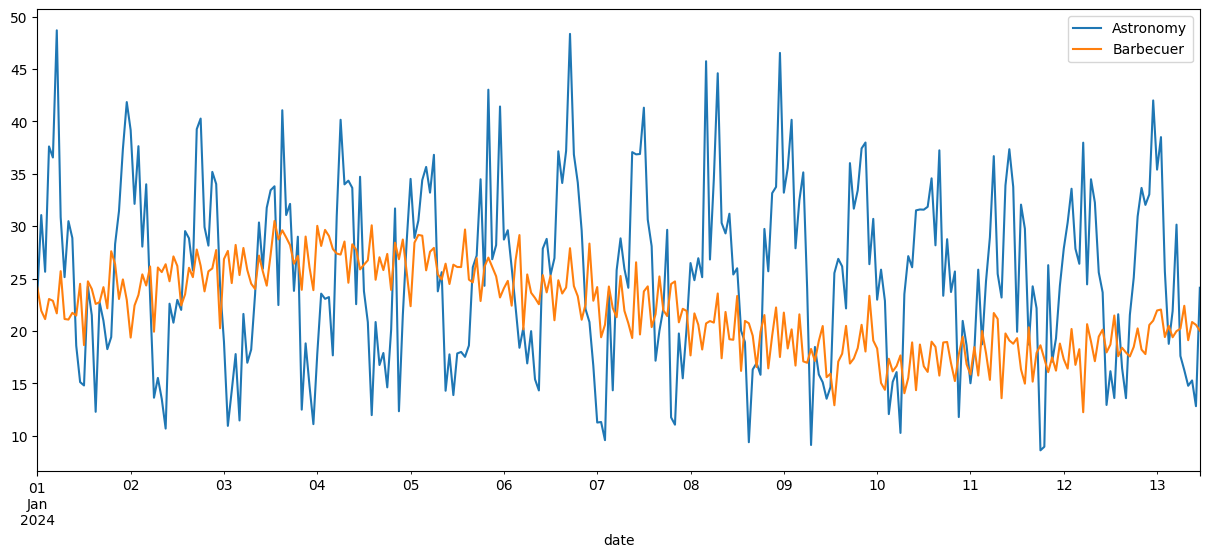

In [178]:
fig, ax = plt.subplots(figsize=(15,6))

astro.plot(x='date', y='sales', ax=ax, label='Astronomy')
barb.plot(x='date', y='sales', ax=ax, label='Barbecuer')

plt.show()

<div class="alert alert-info"> 
    <br>
    <b>Exercise: A third app, Cacophony, was released just before the new year. How is it doing compared with the other apps?</b>   
    <br>
    <br>
</div>

In [180]:
# %load ../Files/cacophony.py
caco = pd.read_csv("../Files/Cacophony_sales.csv")
caco['date'] = pd.to_datetime(caco['date'])

fig, ax = plt.subplots(figsize=(15,6))

astro.plot(x='date', y='sales', ax=ax, label='Astronomy')
barb.plot(x='date', y='sales', ax=ax, label='Barbecuer')
caco.plot(x='date', y='sales', ax=ax, label='Cacophony')

plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_27800\2472065657.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  caco['date'] = pd.to_datetime(caco['date'])


DateParseError: Unknown datetime string format, unable to parse: Wednesday, 14:00:00, the 10 of January, 2024, at position 0

In [201]:
caco = pd.read_csv("../Files/Cacophony_sales.csv")

In [192]:
caco.head()

,date,sales
0,"Wednesday, 14:00:00, the 10 of January, 2024",28.738674
1,"Saturday, 09:00:00, the 13 of January, 2024",18.606399
2,"Sunday, 21:00:00, the 07 of January, 2024",17.277141
3,"Wednesday, 08:00:00, the 03 of January, 2024",29.405986
4,"Wednesday, 03:00:00, the 10 of January, 2024",27.435225


In [202]:
caco['date'] = pd.to_datetime(caco['date'], format = '%A, %X, the %d of %B, %Y')

In [203]:
caco.head()

,date,sales
0,2024-01-10 14:00:00,28.738674
1,2024-01-13 09:00:00,18.606399
2,2024-01-07 21:00:00,17.277141
3,2024-01-03 08:00:00,29.405986
4,2024-01-10 03:00:00,27.435225


In [196]:
caco.sort_values(by = 'date', inplace = True)

<Axes: xlabel='date'>

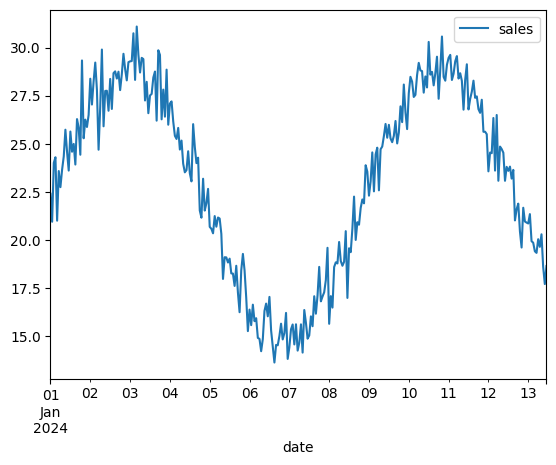

In [198]:
caco.plot(x = 'date', y = 'sales')